##PART 1: CONSTRUCTING TOPIC MODELS FOR TIMBERLAND BRAND

In [ ]:
import pickle
import json

from google.colab import drive
drive.mount('/content/drive')

path = 'drive/My Drive/Colab Notebooks/Vargo3/reviews_Clothing_Shoes_and_Jewelry.json'
loadedjson = open(path, 'r')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##STEP 1: EXTRACT ASINS

In [ ]:
count = 0
allreviews = {}
for aline in loadedjson:
  count += 1
  if count % 100000 == 0:
    print(count)

  areview = eval(aline)  

  allreviews[count] = areview

print(len(allreviews))

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5748920


In [ ]:
print(count)

5748920


In [ ]:
from time import sleep

AllTimberlandAsins = []

for data in open('drive/My Drive/Colab Notebooks/Vargo1/allasins.txt','r'):
  asins = data.split(',')
  for anasin in asins:
    AllTimberlandAsins.append(anasin)
print(AllTimberlandAsins)   

['B004MPRJ4O', 'B00828VMMM', 'B005FM6B2Y', 'B00B9PAHPS', 'B00BH0B8YO', 'B005FNWCEO', 'B000YSWCL8', 'B00E8RCLTY', 'B005GYK9V0', 'B000XEOEWI', 'B004K6A9BK', 'B0090X4M16', 'B00AW8JNAI', 'B00BRS0MAW', 'B0056QW2YA', 'B006ZVSI5M', 'B0098X6M3E', 'B00H46N5FU', 'B000YDHHRW', 'B004335IQQ', 'B005BWB47U', 'B004089WZ2', 'B005GYK4N8', 'B00AZPQ856', 'B00AQMDTAK', 'B00BCJZ2T2', 'B006ZGVF70', 'B009PWFKY0', 'B00B1JUFQS', 'B003AKLMOU', 'B00BCJVHQ4', 'B005GT0HX0', 'B00B9PARDA', 'B004LL2ZW0', 'B002CVUT0Q', 'B002QKMD66', 'B0002RDYMC', 'B00E3LA0TI', 'B008AH79FE', 'B00AW8K0WI', 'B004RDY53E', 'B0058RMG4I', 'B00FW6OW38', 'B00B7FHC1W', 'B000XEGQ6A', 'B000YSSC62', 'B00E41X5XA', 'B00G7SBDP0', 'B0019QW9A8', 'B006T32WNK', 'B00828VMQI', 'B00AH8FW80', 'B00GNZG4PQ', 'B005I6UFH4', 'B001O1PO96', 'B0071BDC0Q', 'B008N6YMGQ', 'B001VNCKJY', 'B005BWB51U', 'B0009FCEX2', 'B000VX03N0', 'B002NEGCC6', 'B007G4VMX2', 'B00AZPP8HU', 'B00B02U0MK', 'B000XETPIQ', 'B006T308KY', 'B00AW7ZBBE', 'B001EWFFFS', 'B007783JR4', 'B001FY5SAW', 'B00A

##STEP 2: EXTRACT REVIEWS FOR TIMBERLAND

In [ ]:
timberlandreviews = {}
count = 0
for areview in allreviews:
  count += 1
  if count % 100000 == 0:
      print(count/5748920)

  thereview = allreviews[areview]  
  theasin = thereview['asin']
  reviewerid = thereview['reviewerID']
  if thereview['asin'] in AllTimberlandAsins:
    thekey = '%s.%s' % (theasin, reviewerid)
    timberlandreviews[thekey] = thereview

print(len(timberlandreviews))

0.017394571502125616
0.03478914300425123
0.05218371450637685
0.06957828600850247
0.08697285751062808
0.1043674290127537
0.12176200051487931
0.13915657201700493
0.15655114351913055
0.17394571502125616
0.19134028652338178
0.2087348580255074
0.226129429527633
0.24352400102975863
0.2609185725318843
0.27831314403400986
0.2957077155361355
0.3131022870382611
0.33049685854038674
0.34789143004251233
0.365286001544638
0.38268057304676356
0.4000751445488892
0.4174697160510148
0.43486428755314044
0.452258859055266
0.46965343055739167
0.48704800205951726
0.5044425735616429
0.5218371450637685
0.5392317165658941
0.5566262880680197
0.5740208595701454
0.591415431072271
0.6088100025743965
0.6262045740765222
0.6435991455786478
0.6609937170807735
0.678388288582899
0.6957828600850247
0.7131774315871503
0.730572003089276
0.7479665745914015
0.7653611460935271
0.7827557175956528
0.8001502890977784
0.8175448605999039
0.8349394321020296
0.8523340036041552
0.8697285751062809
0.8871231466084064
0.904517718110532


In [ ]:
print(timberlandreviews.keys())

dict_keys(['B000073TM3.A1CX6C5BO9DRGN', 'B000073TM3.A36UYIBGY41AZ1', 'B000073TM3.A5BTK3YH51YPE', 'B000073TM3.AII5S3QZAD0UX', 'B000073TM3.A1Z807H5EUTXDY', 'B000073TM3.A2TOUUQDQYZHSO', 'B000073TM3.A3V4DUBZJBKEZ3', 'B000073TM3.A22OII8PJX4VSQ', 'B000073TM3.AOHZJ1UELMDVP', 'B000073TM3.A3CB85BN6VKT4S', 'B000073TM3.A1MLOOQ0VTSZZ0', 'B000073TM3.A2G74OD9JAH1K9', 'B000073TM3.A2KKYLZ021GA6M', 'B000073TM3.A3HCUMXKWTZ8UQ', 'B000073TM3.AOR1SDHU1S8XR', 'B000073TM3.AM5DARL4R295T', 'B000073TM3.A229RUA22FI1EF', 'B000073TM3.A31JKM5A6VR4WZ', 'B000073TM3.A3T5ABM4HUP37B', 'B000073TM3.AVAE428FMEVYC', 'B000073TM3.A1YY2WNOVQMLE6', 'B000073TM3.A2X8GFEZTKUJF3', 'B000073TM3.A170QXEZJL7HI9', 'B000073TM3.A3RVG2BUYD41HU', 'B000073TM3.A1UEMKHAUMJ7Y9', 'B000073TM3.A2ENNL2OZG9Q4V', 'B000073TM3.A15TU4ZZWOM8G2', 'B000073TM3.A27BTIWH9ZVJ5V', 'B000073TM3.A3AR4HWAYGXS7E', 'B000073TM3.AJTLEH9JGUDV3', 'B000073TM3.A2V78ICCSZ0H6T', 'B000073TM3.A2Z2S2PDATXRIH', 'B000073TM3.AIUE3R4ZTOY79', 'B000073TM3.A20UBA3HK84RY2', 'B000073TM3

In [ ]:
timberlandRevs = []
for _id, data in timberlandreviews.items():
  text = data['reviewText']
  timberlandRevs.append(text)

In [ ]:
timberlandSamp = timberlandRevs[0:1000]

##STEP 3: PREPROCESS DATA FOR TOPIC MODEL

In [ ]:
!pip install tmtoolkit

import nltk 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

     |████████████████████████████████| 19.9MB 236kB/s 
     |████████████████████████████████| 1.5MB 37.6MB/s 
     |████████████████████████████████| 112kB 50.4MB/s 
     |████████████████████████████████| 2.3MB 52.7MB/s 
     |████████████████████████████████| 3.0MB 42.8MB/s 
     |████████████████████████████████| 22.1MB 189kB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449905 sha256=6a6fd1ee3b91acfe5a9b050a76268124a174d0835ca6af0f7d966b47424f2ee0
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
  Created wheel for globre: filename=globre-0.1.5-cp36-none-any.whl size=19528 sha256=fd282d57bce76c04fdec818ed80001099fc39c51bf068f7aa8c36c6d5f9f3817
  Stored in directory: /root/.cache/pip/wheels/c4/3f/7f/be546f6d880521a8a7a1fe84cbe135fa859be63084682d3292
Successfully built nltk globre
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
  Foun

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
!pip install tmtoolkit



from tmtoolkit.corpus import Corpus




Corpus = Corpus()

TEXT_FIELD = 8

for i, line in enumerate(timberlandSamp):
  Corpus.add_doc(str(i), line)

In [ ]:
print(len(Corpus))
Corpus.doc_labels
Corpus['91']

1000


"These boots are the best! I love them! The shipping was fast and I was excited when they were delivered to me. I wear size 8 in women's so I ordered 6 M and it fits perfectly. Also, there's plenty of room in these boots."

(array([645., 224.,  60.,  37.,  13.,   7.,   6.,   4.,   1.,   3.]),
 array([   4. ,  236.6,  469.2,  701.8,  934.4, 1167. , 1399.6, 1632.2,
        1864.8, 2097.4, 2330. ]),
 <a list of 10 Patch objects>)

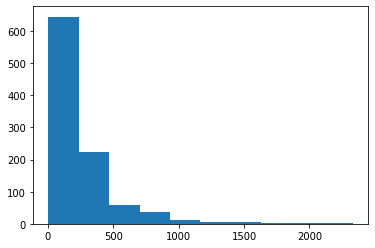

In [ ]:
import matplotlib

matplotlib.pyplot.hist(Corpus.doc_lengths.values())

In [ ]:
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(Corpus)
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http', 'nt','time','month','week','day','year'])

<TMPreproc [1000 documents]>

In [ ]:
Corpus['91']

"These boots are the best! I love them! The shipping was fast and I was excited when they were delivered to me. I wear size 8 in women's so I ordered 6 M and it fits perfectly. Also, there's plenty of room in these boots."

In [ ]:
preproc.tokens['91']

['these',
 'boot',
 'be',
 'the',
 'best',
 '',
 'i',
 'love',
 'them',
 '',
 'the',
 'shipping',
 'be',
 'fast',
 'and',
 'i',
 'be',
 'excite',
 'when',
 'they',
 'be',
 'deliver',
 'to',
 'me',
 '',
 'i',
 'wear',
 'size',
 '8',
 'in',
 'woman',
 's',
 'so',
 'i',
 'order',
 '6',
 'm',
 'and',
 'it',
 'fit',
 'perfectly',
 '',
 'also',
 '',
 'there',
 's',
 'plenty',
 'of',
 'room',
 'in',
 'these',
 'boot',
 '']

In [ ]:
preproc.vocabulary_size

3688

In [ ]:
preproc.stem()

<TMPreproc [1000 documents]>

In [ ]:
preproc.tokens['91']

['these',
 'boot',
 'be',
 'the',
 'best',
 '',
 'i',
 'love',
 'them',
 '',
 'the',
 'ship',
 'be',
 'fast',
 'and',
 'i',
 'be',
 'excit',
 'when',
 'they',
 'be',
 'deliv',
 'to',
 'me',
 '',
 'i',
 'wear',
 'size',
 '8',
 'in',
 'woman',
 's',
 'so',
 'i',
 'order',
 '6',
 'm',
 'and',
 'it',
 'fit',
 'perfect',
 '',
 'also',
 '',
 'there',
 's',
 'plenti',
 'of',
 'room',
 'in',
 'these',
 'boot',
 '']

In [ ]:
preproc.tokens_datatable

,doc,position,token,meta_pos
0,0,0,i,PRP
1,0,1,ve,VBP
2,0,2,purchas,NNP
3,0,3,field,NNP
4,0,4,boot,NNP
...,...,...,...,...
23,999,23,to,TO
24,999,24,buy,VB
25,999,25,and,CC
26,999,26,recommend,VB


In [ ]:
preproc_smaller = preproc.copy()
preproc_smaller.filter_for_pos('N')
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_common_tokens(df_threshold=0.8)
preproc_smaller.remove_uncommon_tokens(df_threshold=0.01)

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

3265
135


In [ ]:
import numpy as np

In [ ]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '101', '102', '103', '104', '105', '106'],
      dtype='<U3')

In [ ]:
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary)

In [ ]:
dtm_bg = preproc.dtm
dtm_sm = preproc_smaller.dtm

dtm_bg, dtm_sm

(<1000x3265 sparse matrix of type '<class 'numpy.int32'>'
 	with 39075 stored elements in Compressed Sparse Row format>,
 <1000x135 sparse matrix of type '<class 'numpy.int32'>'
 	with 5275 stored elements in Compressed Sparse Row format>)

In [ ]:
!pip install tmtoolkit['lda']
import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False

warnings.filterwarnings('ignore')

dtms = {
    'bigger': dtm_bg,
    'smaller': dtm_sm
}

lda_params = {
    'n_topics': 50,
    'eta': .05,
    'n_iter': 1000,
    'random_state': 20191122
}

models = compute_models_parallel(dtms, constant_parameters=lda_params)

     |████████████████████████████████| 358kB 2.8MB/s 
     |████████████████████████████████| 102kB 11.9MB/s 


##CODE THAT EXECUTES AND PRINTS TOPICS

In [ ]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n=3)

topic_1
> #1. son (0.412081)
> #2. boot (0.224161)
> #3. school (0.098881)
topic_2
> #1. foot (0.228697)
> #2. boot (0.211127)
> #3. ankl (0.117423)
topic_3
> #1. boot (0.584144)
> #2. timberland (0.223784)
> #3. job (0.029189)
topic_4
> #1. foot (0.169942)
> #2. snow (0.169942)
> #3. weather (0.131407)
topic_5
> #1. timberland (0.220787)
> #2. leather (0.208189)
> #3. qualiti (0.201890)
topic_6
> #1. foot (0.397840)
> #2. kind (0.095464)
> #3. heel (0.095464)
topic_7
> #1. color (0.395066)
> #2. boot (0.144592)
> #3. amazon (0.099051)
topic_8
> #1. great (0.219569)
> #2. look (0.133464)
> #3. fit (0.109980)
topic_9
> #1. size (0.405964)
> #2. foot (0.175348)
> #3. fit (0.175348)
topic_10
> #1. toe (0.364247)
> #2. steel (0.294908)
> #3. shoe (0.169231)
topic_11
> #1. boot (0.533694)
> #2. winter (0.230991)
> #3. weather (0.072432)
topic_12
> #1. boot (0.390105)
> #2. work (0.144228)
> #3. comfort (0.084258)
topic_13
> #1. size (0.427284)
> #2. woman (0.171056)
> #3. order (0.071412)
t

##SEGMENTING DATA BY SALES RANK

##STEP 5

In [ ]:
import pickle
import json

from google.colab import drive
drive.mount('/content/drive')

path = 'drive/My Drive/Colab Notebooks/Vargo3/meta_Clothing_Shoes_and_Jewelry.json'
loadedjson1 = open(path, 'r')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from time import sleep

count = 0
allproducts= {}
for aline in loadedjson1:
  count += 1
  if count % 100000 == 0:
    print(count) 
  aproduct = eval(aline)

  allproducts[aproduct['asin']] = aproduct

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000


In [ ]:
len(allproducts)

1503384

In [ ]:
allcategories = {}
count = 0

for aproduct in allproducts:
  count += 1
  if count % 100000 == 0:
      print(count/1503384)

  aproduct = allproducts[aproduct]  
 

  if 'categories' in aproduct:
    for categories in aproduct['categories']:
      for acategory in categories:
          if acategory in allcategories:
              allcategories[acategory] += 1
          if acategory not in allcategories:
              allcategories[acategory] = 1 

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518


In [ ]:
sortedlist= []
for acategory in allcategories:
  sortedlist.append((allcategories[acategory], acategory))

sortedlist= sorted(sortedlist, reverse= True)

for item in range(0,50):
  print(sortedlist[item])

(3429257, 'Clothing, Shoes & Jewelry')
(1086181, 'Women')
(617092, 'Clothing')
(541681, 'Men')
(537761, 'Novelty, Costumes & More')
(432653, 'Shoes')
(339900, 'Novelty')
(268065, 'Shoes & Accessories: International Shipping Available')
(255454, 'Jewelry')
(174962, 'Accessories')
(97095, 'Girls')
(93596, 'Tops & Tees')
(87688, 'Dresses')
(84549, 'T-Shirts')
(82063, 'Boots')
(80302, 'Shirts')
(79897, 'Sandals')
(79545, 'Watches')
(77684, 'Boys')
(73507, 'Jewelry: International Shipping Available')
(72372, 'Athletic')
(71414, 'Wrist Watches')
(70335, 'Sports & Outdoors')
(59763, 'Petite')
(58350, 'Fashion')
(53826, 'Costumes & Accessories')
(53021, 'Earrings')
(51728, 'Baby')
(50943, 'Comfort Shoes')
(50662, 'Casual')
(50357, 'Boot Shop')
(50124, 'C')
(49599, 'Active')
(49491, 'Band & Music Fan')
(46004, 'New Arrivals')
(43722, 'Necklaces & Pendants')
(43410, 'Intimates')
(43100, 'S')
(41709, 'Lingerie, Sleep & Lounge')
(41542, 'Handbags & Wallets')
(41400, 'Rings')
(40832, "Women's Luxur

In [ ]:
allcategories['Timberland']

3899

In [ ]:
alltimberlandasins= {}
count = 0
from time import sleep

for areview in allproducts:
  count += 1
  if count % 100000 == 0:
    print(count/1503384)

  theproduct= allproducts[areview]
  
  if 'salesRank' in theproduct:
    for categories in theproduct['categories']:
      for acategory in categories:
        if 'timberland' in acategory.lower():
          for acategory in theproduct['salesRank']:
            alltimberlandasins[areview] = theproduct['salesRank'][acategory]
            
print(len(alltimberlandasins))

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518
4556


In [ ]:
unsortedsalesrank=[]
for aproduct in alltimberlandasins:
  unsortedsalesrank.append((alltimberlandasins[aproduct], aproduct))

In [ ]:
sortedsalesrank = sorted(unsortedsalesrank)

In [ ]:
top100products= sortedsalesrank[0:100]

In [ ]:
salesrank = []
for aproduct in sortedsalesrank:
  salesrank.append(aproduct[0])

In [ ]:
print(salesrank[0:100])

[74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 132, 203, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251]


In [ ]:
sortedsalesrank[0]

(74, 'B005BWB2QI')

In [ ]:
sortedsalesrank[50]

(89, 'B005FI27PI')

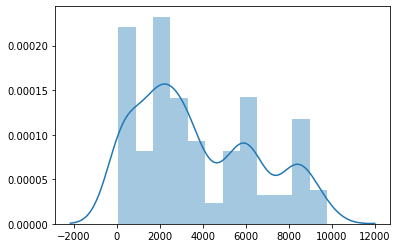

In [ ]:
import numpy as np
import seaborn as sns
ax = sns.distplot(salesrank[0:1000])